Implementar Lasso (L1) y Ridge (L2) en un conjunto de datos utilizando Python y la biblioteca scikit-learn. Utilizaremos el conjunto de datos "felicidad.csv", que contiene información sobre la felicidad en diferentes países. Asegúrese de tener scikit-learninstalado antes de comenzar.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carga del conjunto de datos
data = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/felicidad.csv')

# Codificación one-hot para la columna 'country'
data = pd.get_dummies(data, columns=['country'], drop_first=True)

# Separación de características y etiquetas
X = data.drop(columns=['score'])
y = data['score']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicación de Lasso (L1)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Aplicación de Ridge (L2)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print(f'MSE Lasso: {lasso_mse}')
print(f'MSE Ridge: {ridge_mse}')
print(X)
print(y)

MSE Lasso: 0.010312766264690335
MSE Ridge: 0.029278438946391875
     rank      high       low       gdp    family    lifexp   freedom  \
0       1  7.594445  7.479556  1.616463  1.533524  0.796667  0.635423   
1       2  7.581728  7.462272  1.482383  1.551122  0.792566  0.626007   
2       3  7.622030  7.385970  1.480633  1.610574  0.833552  0.627163   
3       4  7.561772  7.426227  1.564980  1.516912  0.858131  0.620071   
4       5  7.527542  7.410458  1.443572  1.540247  0.809158  0.617951   
..    ...       ...       ...       ...       ...       ...       ...   
150   151  3.543030  3.398970  0.368746  0.945707  0.326425  0.581844   
151   152  3.663669  3.260331  0.777153  0.396103  0.500533  0.081539   
152   153  3.461430  3.236570  0.511136  1.041990  0.364509  0.390018   
153   154  3.074690  2.735310  0.091623  0.629794  0.151611  0.059901   
154   155  2.864884  2.521116  0.000000  0.000000  0.018773  0.270842   

     generosity  corruption  dystopia  ...  country_United 

En este ejemplo, estamos utilizando Lasso (L1) y Ridge (L2) para realizar una regresión lineal en el conjunto de datos "felicidad.csv". Primero, cargamos el conjunto de datos y lo dividimos en conjuntos de entrenamiento y prueba. Luego, estandarizamos las características para que tengan media cero y desviación estándar uno.

Después, aplicamos Lasso y Ridge con diferentes valores de alpha(parámetro de regularización) y evaluamos el rendimiento de ambos modelos utilizando el error cuadrático medio (MSE). Elige el valor de alphaque funcione mejor para tus datos a través de validación cruzada.

Recuerde que Lasso (L1) puede llevar a la selección automática de características al empujar algunos coeficientes a cero, mientras que Ridge (L2) tiende a reducir la magnitud de los coeficientes sin eliminarlos por completo.

In [4]:
print(X_train, X_test, y_train, y_test )
print('e,n, l e')

     rank      high       low       gdp    family    lifexp   freedom  \
96     97  5.079335  4.942666  0.885416  1.340127  0.495879  0.501538   
122   123  4.377164  4.206836  0.648457  1.272031  0.285349  0.096098   
82     83  5.341044  5.132956  1.121129  1.238376  0.667465  0.194989   
109   110  4.689822  4.526178  0.586683  0.735132  0.533241  0.478357   
65     66  5.688140  5.533860  1.320879  1.476671  0.695168  0.479131   
..    ...       ...       ...       ...       ...       ...       ...   
71     72  5.545335  5.314665  0.857699  1.253918  0.468009  0.585215   
106   107  4.796541  4.593459  0.564305  0.946018  0.132892  0.430389   
14     15  7.043352  6.910649  1.535707  1.558231  0.809783  0.573110   
92     93  5.242484  5.059516  0.022643  0.721151  0.113989  0.602127   
102   103  4.881848  4.668152  0.716249  1.155647  0.565667  0.254711   

     generosity  corruption  dystopia  ...  country_United Arab Emirates  \
96     0.474055    0.173380  1.140184  ...     

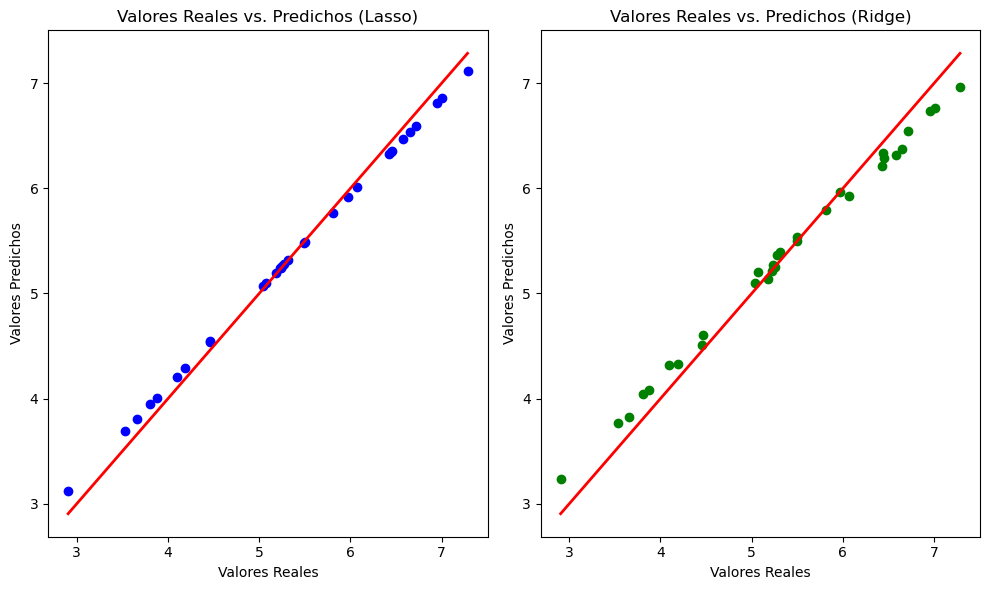

In [6]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Gráfico de valores reales vs. predichos para Lasso
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Valores Reales vs. Predichos (Lasso)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Gráfico de valores reales vs. predichos para Ridge
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Valores Reales vs. Predichos (Ridge)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()
#Este código creará dos gráficos lado a lado, cada uno mostrando los valores reales versus los valores 
# predichos por Lasso y Ridge. 
# La línea roja en los gráficos representa la línea ideal en la que los valores reales y predichos coinciden perfectamente. Si los puntos están cerca de esta línea, significa que los modelos están haciendo buenas predicciones.







notas 
  # Aquí vamos a partir nuestro entrenaminto en training y test, no hay olvidar el orden
    # Con el test size elejimos nuestro porcetaje de datos para training 
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

    # Aquí definimos nuestros regresores uno por 1 y llamamos el fit o ajuste 
    modelLinear = LinearRegression().fit(X_train, y_train)
    # Vamos calcular la prediccion que nos bota con la funcion predict con la regresion lineal 
    # y le vamos a mandar el test 
    y_predict_linear = modelLinear.predict(X_test)

    # Configuramos alpha, que es valor labda y entre mas valor tenga alpha en lasso mas penalizacion 
    # vamos a tener y lo entrenamos con la función fit 
    modelLasso = Lasso(alpha=0.2).fit(X_train, y_train)
    # Hacemos una prediccion para ver si es mejor o peor de lo que teniamos en el modelo lineal sobre
    # exactamente los mismos datos que teníamos anteriormente 
    y_predict_lasso = modelLasso.predict(X_test)

    # Hacemos la misma predicción, pero para nuestra regresion ridge 
    modelRidge = Ridge(alpha=1).fit(X_train, y_train)
    # Calculamos el valor predicho para nuestra regresión ridge 
    y_predict_ridge = modelRidge.predict(X_test)

    # Calculamos la perdida para cada uno de los modelos que entrenamos, empezaremos con nuestro modelo 
    # lineal, con el error medio cuadratico y lo vamos a aplicar con los datos de prueba con la prediccion 
    # que hicimos 
    linear_loss = mean_squared_error(y_test, y_predict_linear)
    # Mostramos la perdida lineal con la variable que acabamos de calcular
    print("Linear loss: ", linear_loss) 
    
    # Mostramos nuestra perdida Lasso, con la variable lasso loss 
    lasso_loss = mean_squared_error(y_test, y_predict_lasso)
    print("Lasso Loss. ", lasso_loss) 

    # Mostramos nuestra perdida de Ridge con la variable lasso loss 
    ridge_loss = mean_squared_error(y_test, y_predict_ridge)
    print("Ridge loss: ", ridge_loss)

    # Imprimimos las coficientes para ver como afecta a cada una de las regresiones 
    # La lines "="*32 lo unico que hara es repetirme si simbolo de igual 32 veces 
    print("="*32)
    print("Coeficientes lasso: ")
    # Esta informacion la podemos encontrar en la variable coef_ 
    print(modelLasso.coef_)

    # Hacemos lo mismo con ridge 
    print("="*32)
    print("Coeficientes ridge:")
    print(modelRidge.coef_) 